# Turnout by Age

In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import timedelta


from processing import *
from plotting import *

## Load and Combine Data

In [2]:

MUNICIPAL_YEARS = np.arange(2011, 2023, 2)
STATE_YEARS = np.arange(2012, 2023, 2)
NATIONAL_YEARS = np.arange(2012, 2023, 4)
ALL_YEARS = np.arange(2011, 2023, 1)

In [5]:

voters = load_full_dataset("data")
age_grouped = turnout_by_year_key(voters, "age", 4)
age_grouped

voted  registered   turnout  mid_points
year age_group                                         
2011 18-22        244        2766  0.088214          20
     22-26        644        6366  0.101162          24
     26-30        832        8999  0.092455          28
     30-34        828        7378  0.112226          32
     34-38        731        4842  0.150971          36
...               ...         ...       ...         ...
2022 94-98         54         145  0.372414          96
     98-102        15          57  0.263158         100
     102-106        0          10  0.000000         104
     106-110        0           5  0.000000         108
     110-114        0           2  0.000000         112

[278 rows x 4 columns]

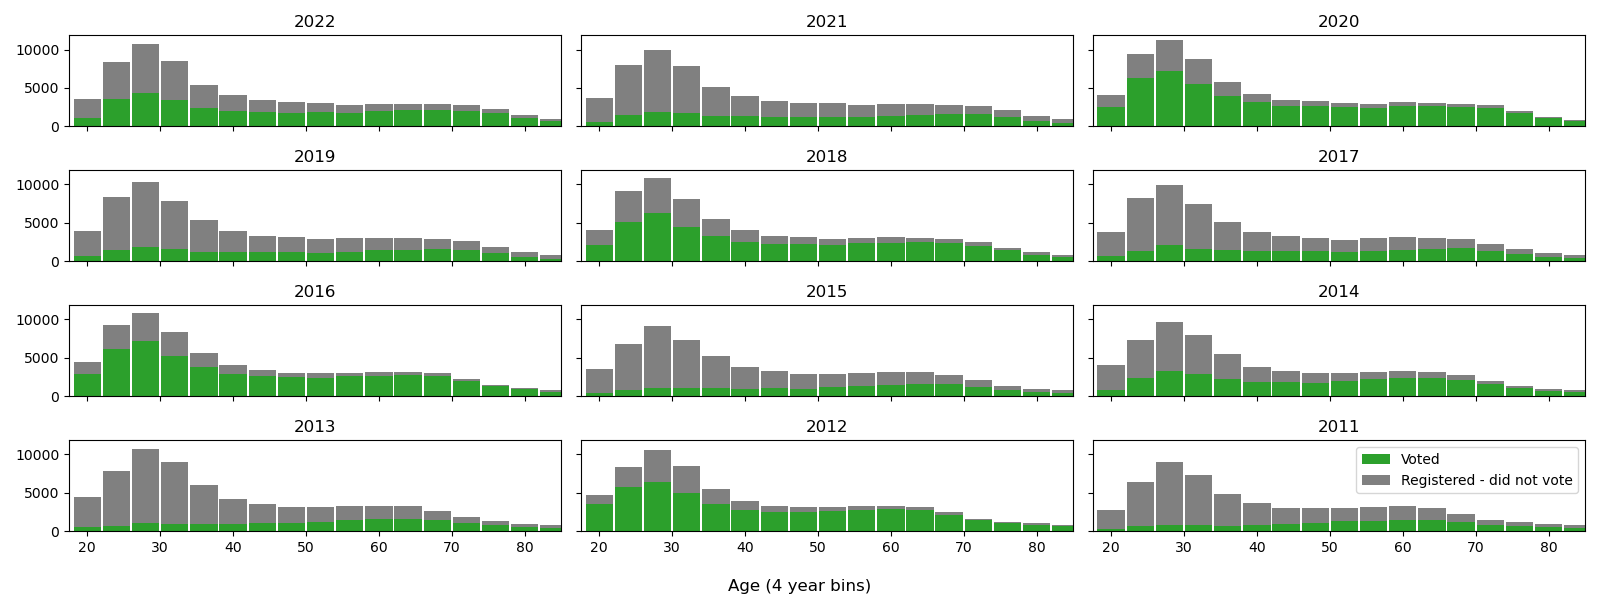

In [6]:
fig, axs = multi_year_bar(age_grouped, turnout_bar_graph, years_per_row=3)
fig.supxlabel("Age (4 year bins)")
axs[-1][-1].legend()
axs[-1,-1].set_xlim([17.5, 85])
plt.tight_layout()
# plt.tight_layout()

<Axes: xlabel='year'>

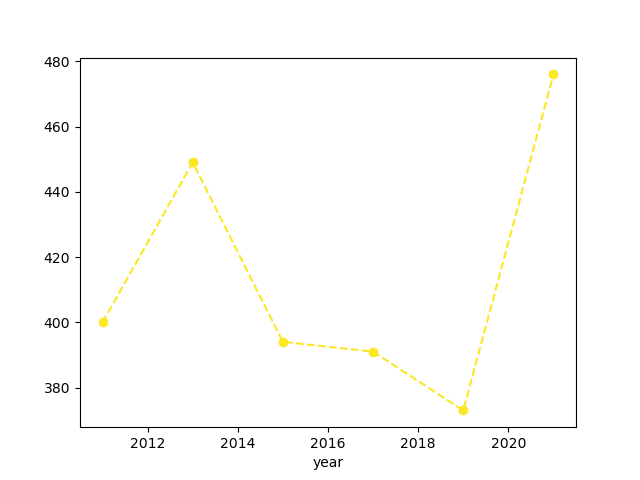

In [19]:

plt.figure()
age_grouped['voted'].loc[MUNICIPAL_YEARS].xs(group, level=1).plot(label=group, style='o--', color=colors[i])

Text(0.5, 0.98, 'Turnout by Age and Year (All Years)')

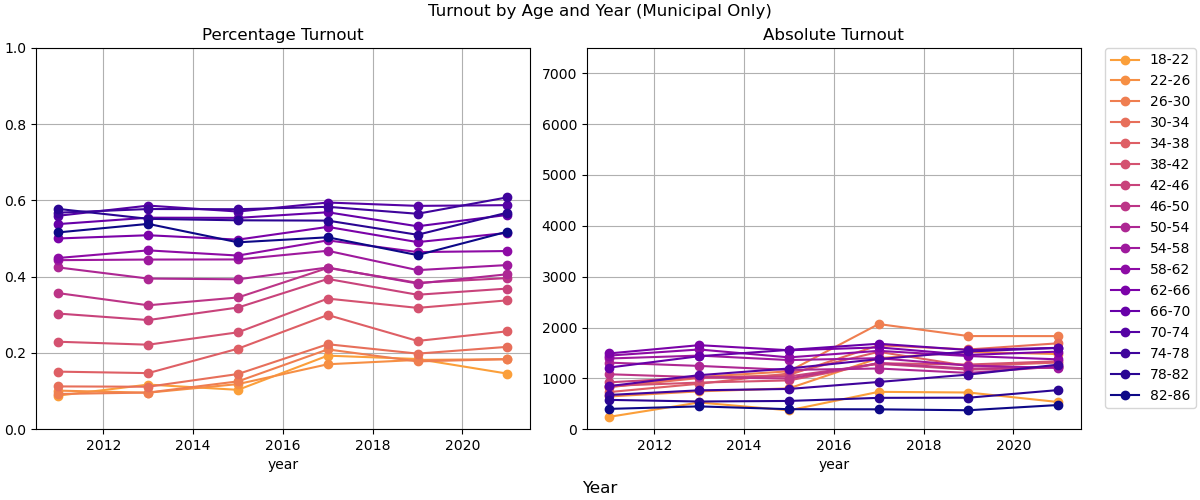

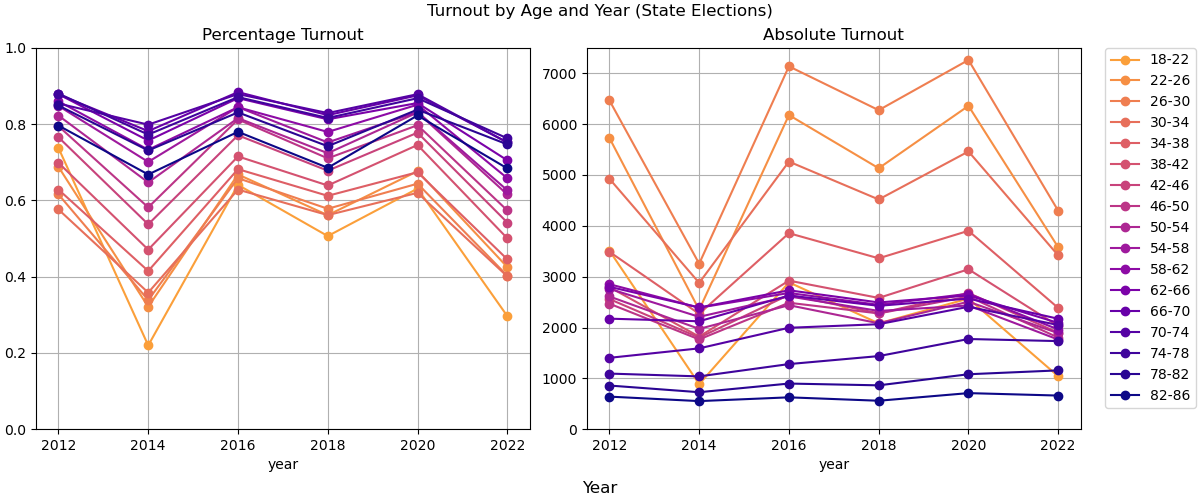

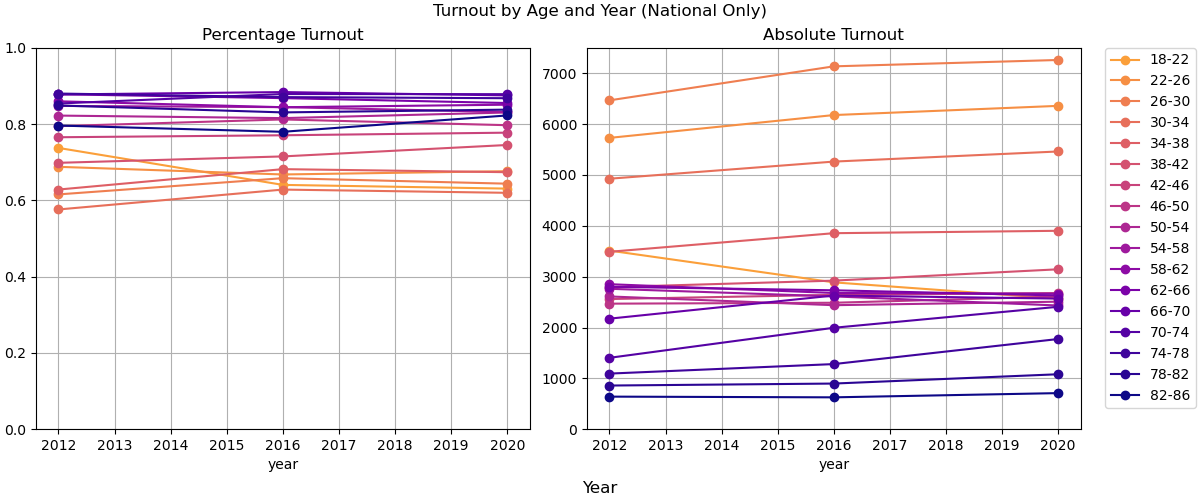

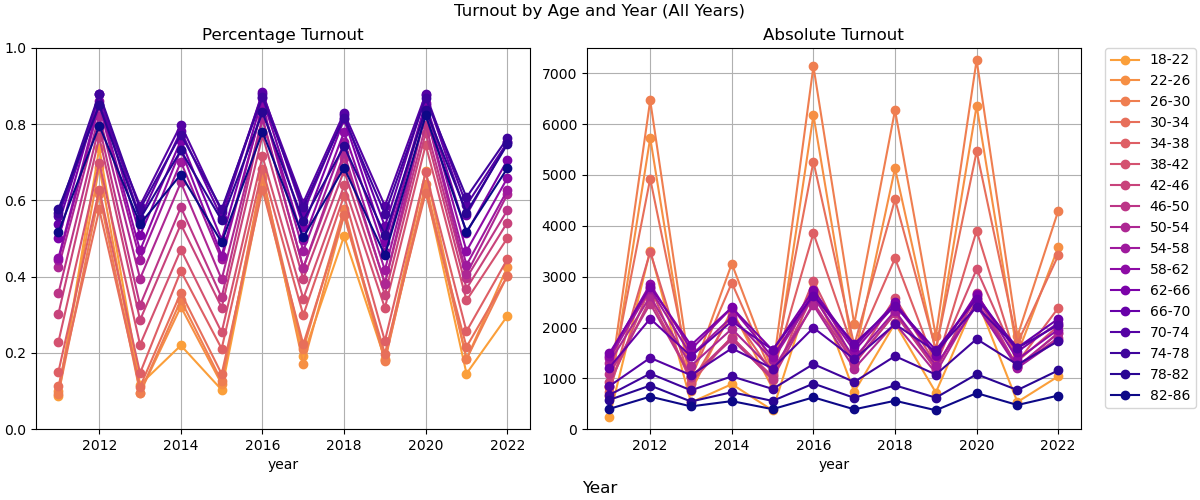

In [34]:

def line_plot_turnout_age(df, years):
    ages = np.arange(18, 85, 4)
    groups = [f"{i}-{i+4}" for i in ages]
    colors = plt.cm.plasma_r(ages/ages.max())
    
    fig, axs = plt.subplots(1,2,figsize=(12,5),constrained_layout=True)
    for i, group in enumerate(groups):
    
        df.loc[years]['turnout'].xs(group, level=1).plot(label=group, style='o-', color=colors[i], ax=axs[0])
        df.loc[years]['voted'].xs(group, level=1).plot(label=group, style='o-', color=colors[i], ax=axs[1])

    axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    axs[0].set_title("Percentage Turnout")
    axs[1].set_title("Absolute Turnout")
    fig.supxlabel("Year")
    axs[0].grid()
    axs[1].grid()
    axs[0].set_ylim([0, 1])
    axs[1].set_ylim([0, 7500])
    return fig, axs

fig, axs = line_plot_turnout_age(age_grouped, MUNICIPAL_YEARS)
fig.suptitle("Turnout by Age and Year (Municipal Only)")

fig, axs = line_plot_turnout_age(age_grouped, STATE_YEARS)
fig.suptitle("Turnout by Age and Year (State Elections)")

fig, axs = line_plot_turnout_age(age_grouped, NATIONAL_YEARS)
fig.suptitle("Turnout by Age and Year (National Only)")

fig, axs = line_plot_turnout_age(age_grouped, ALL_YEARS)
fig.suptitle("Turnout by Age and Year (All Years)")


In [ ]:

import cmasher
YEAR_COLORS= {year:color for year,color in zip(ALL_YEARS, plt.get_cmap('tab20').colors)}
# YEAR_COLORS= {year:color for year,color in zip(ALL_YEARS, cmasher.take_cmap_colors('tab20', len(ALL_YEARS)))}


def line_plot_age_turnout(df, years, low_alpha_years=None):
    fig, axs = plt.subplots(1,2,figsize=(12,4.5),constrained_layout=True)

    if low_alpha_years is None:
        low_alpha_years = []
    for year in years:
        if year in low_alpha_years:
            alpha = .5
            # alpha =1
            linestyle='--'
        else:
            alpha = 1
            linestyle='-'
            
        axs[0].plot(
            df.loc[year]['mid_points'].values, df.loc[year]['turnout'].values*100,'o',
            color=YEAR_COLORS[year][:3], linestyle=linestyle, label=year, alpha=alpha
        )
        axs[1].plot(
            df.loc[year]['mid_points'].values, df.loc[year]['voted'].values, 'o',
            color=YEAR_COLORS[year][:3], linestyle=linestyle, label=year, alpha=alpha
        )
    axs[0].set_title("Turnout %")
    axs[1].set_title("Turnout Numbers")
    axs[0].set_ylabel("%")
    axs[1].set_ylabel("Number of Votes Cast")
    labelsize = 15
    axs[0].grid()
    axs[1].grid()
    fig.supxlabel("Age (4 yr bins)", size=labelsize)
    plt.legend()
    return fig, axs

fig, axs =line_plot_age_turnout(age_grouped, ALL_YEARS)
fig.suptitle("All Elections")
fig, axs = line_plot_age_turnout(age_grouped, MUNICIPAL_YEARS)
fig.suptitle("Municipal Elections")
# fig, axs =line_plot_age_turnout(age_grouped, STATE_YEARS)
# fig, axs =line_plot_age_turnout(age_grouped, NATIONAL_YEARS)

[(0.0, 0.135112, 0.304751),
 (0.003602, 0.195911, 0.441564),
 (0.185453, 0.258914, 0.426788),
 (0.287065, 0.324103, 0.423373),
 (0.37043, 0.38689, 0.433428),
 (0.448447, 0.451053, 0.456264),
 (0.529086, 0.517207, 0.472543),
 (0.616852, 0.585913, 0.462237),
 (0.708067, 0.657942, 0.435647),
 (0.806859, 0.737385, 0.387684),
 (0.905589, 0.818257, 0.312889),
 (0.995737, 0.909344, 0.217772)]